In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_pd = pd.read_csv(city_data_to_load)
ride_pd = pd.read_csv(ride_data_to_load)
ride_pd.count()
# Combine the data into a single dataset
ride_city_df = pd.merge(ride_pd, city_pd, how='outer', on='city') 
# Display the data table for preview                                 
ride_city_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


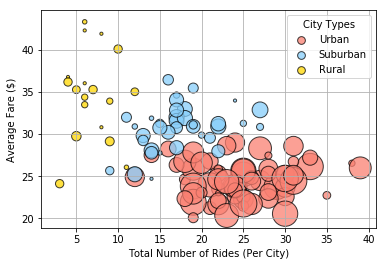

In [2]:
#Groupby City Type and City
group_ridecity_df= ride_city_df.groupby(["type", "city"])
#Calculate Avg Fare, Total Number of Fares and Total number of Drivers
avg_fare = group_ridecity_df["fare"].mean()
total_number_fare = group_ridecity_df["ride_id"].count()
total_drivers = group_ridecity_df["driver_count"].sum()/group_ridecity_df["driver_count"].count()
#Create New Dataframe
city_ride_df = pd.DataFrame({"Average Fare ($) Per City":avg_fare.round(2),
                              "Total Number of Rides Per City": total_number_fare,
                              "Total Number of Drivers Per City": total_drivers})
city_ride_df.head()

# Obtain the x, y and s coordinates for each of the three city types
urban = city_ride_df.loc["Urban",:]
suburban = city_ride_df.loc["Suburban",:]
rural = city_ride_df.loc["Rural",:]

x_urban = urban["Total Number of Rides Per City"]
x_suburban = suburban["Total Number of Rides Per City"]
x_rural = rural["Total Number of Rides Per City"]

y_urban = urban["Average Fare ($) Per City"]
y_suburban = suburban["Average Fare ($) Per City"]
y_rural = rural["Average Fare ($) Per City"]

s_urban = urban["Total Number of Drivers Per City"]
s_suburban = suburban["Total Number of Drivers Per City"]
s_rural = rural["Total Number of Drivers Per City"]
#Create Graph
urban = plt.scatter(x_urban, y_urban, s = s_urban*10, marker="o", alpha = 0.75, facecolors="salmon", edgecolors="black")
suburban = plt.scatter(x_suburban, y_suburban, s = s_suburban*10, alpha = 0.75, marker="o", facecolors="lightskyblue", edgecolors="black")
rural = plt.scatter(x_rural, y_rural, s = s_rural*10, marker="o", alpha = 0.75, facecolors="gold", edgecolors="black")
#Create Labels
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
#Create Legend and make circles same size in legend
lgnd = plt.legend(loc="best", labels=["Urban", "Suburban", "Rural"], title="City Types")
for handle in lgnd.legendHandles:
    handle.set_sizes([60.0])
#Save the chart
plt.savefig("ScatterPlot.png")
plt.show()

## Bubble Plot of Ride Sharing Data

## Total Fares by City Type

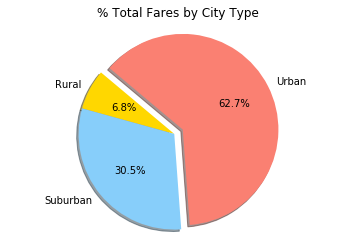

<Figure size 432x288 with 0 Axes>

In [3]:
# Calculate Type Percents
group_type_df= ride_city_df.groupby(["type"])
total_fare = group_type_df["fare"].sum()
types = ["Rural", "Suburban", "Urban"]
# Build Pie Chart
colors = ["gold", "lightskyblue", "salmon"]
explode = (0, 0, 0.1)
plt.title("% Total Fares by City Type")
plt.pie(total_fare, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()
# Save Figure
plt.savefig("TTLFares.png")

## Total Rides by City Type

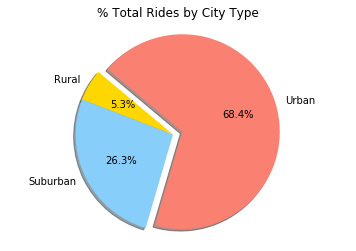

<Figure size 432x288 with 0 Axes>

In [5]:
# Calculate Type Percents
group_type_df= ride_city_df.groupby(["type"])
total_ride = group_type_df["ride_id"].count()
types = ["Rural", "Suburban", "Urban"]
# Build Pie Chart
colors = ["gold", "lightskyblue", "salmon"]
explode = (0, 0, 0.1)
plt.title("% Total Rides by City Type")
plt.pie(total_ride, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()
# Save Figure
plt.savefig("TTLRides.png")

## Total Drivers by City Type

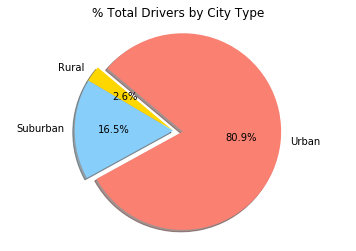

<Figure size 432x288 with 0 Axes>

In [8]:
# Calculate Driver Percents
group_drivers = city_ride_df.groupby(["type"])
total_drivers = group_drivers["Total Number of Drivers Per City"].sum()

# Build Pie Charts
colors = ["gold", "lightskyblue", "salmon"]
explode = (0, 0, 0.1)
plt.title("% Total Drivers by City Type")
plt.pie(total_drivers, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()
# Save Figure
plt.savefig("TTLDrivers.png")

In [ ]:
# Show Figure
plt.show()